This is a sort of super basic preliminary blahblah development notebook for the Statoil Iceberg satellite classification competition. This can be taken as some running thoughts.

In [2]:
%pwd

'/home/wnixalo/iceberg'

In [3]:
%cd data/train

/home/wnixalo/iceberg/data/train


In [4]:
%ls

train.json


In [5]:
import json

In [6]:
with open('train.json') as jsonfile:
    data = json.load(jsonfile)

In [8]:
print(len(data))
print(len(data[0]))

1604
5


In [9]:
for i in data[0]: print(i)

id
band_1
band_2
inc_angle
is_iceberg


In [10]:
b1 = data[0]['band_1']

In [11]:
b1

[-27.878361,
 -27.15416,
 -28.668615,
 -29.537971,
 -29.092485,
 -32.834259,
 -32.190609,
 -29.538139,
 -28.668869,
 -29.092695,
 -26.813871,
 -26.813911,
 -28.264969,
 -25.571039,
 -26.170347,
 -25.571125,
 -28.265137,
 -28.265181,
 -26.170513,
 -28.669331,
 -24.232399,
 -25.571377,
 -30.504866,
 -31.031487,
 -29.538857,
 -27.879414,
 -26.814545,
 -24.484478,
 -25.571672,
 -28.265686,
 -29.539068,
 -28.669796,
 -27.509998,
 -31.031866,
 -31.03191,
 -31.03195,
 -29.53932,
 -29.53936,
 -34.286621,
 -28.670132,
 -25.866602,
 -27.510378,
 -26.171484,
 -26.487411,
 -30.009279,
 -31.032372,
 -26.487539,
 -29.539783,
 -31.032497,
 -29.094337,
 -28.670595,
 -26.815557,
 -25.28783,
 -25.572683,
 -31.032751,
 -36.030342,
 -33.531609,
 -31.593452,
 -29.094717,
 -27.880804,
 -26.815933,
 -27.156643,
 -27.880932,
 -31.593704,
 -31.593744,
 -30.010164,
 -31.033257,
 -28.267242,
 -25.012739,
 -25.288548,
 -27.157022,
 -26.48859,
 -25.573483,
 -26.488674,
 -30.507013,
 -28.66853,
 -27.878401,
 -27.50

In [12]:
import numpy as np

In [13]:
b1_mat = np.reshape(b1, (75,75))

In [14]:
b1_mat[0]

array([-27.878361, -27.15416 , -28.668615, -29.537971, -29.092485,
       -32.834259, -32.190609, -29.538139, -28.668869, -29.092695,
       -26.813871, -26.813911, -28.264969, -25.571039, -26.170347,
       -25.571125, -28.265137, -28.265181, -26.170513, -28.669331,
       -24.232399, -25.571377, -30.504866, -31.031487, -29.538857,
       -27.879414, -26.814545, -24.484478, -25.571672, -28.265686,
       -29.539068, -28.669796, -27.509998, -31.031866, -31.03191 ,
       -31.03195 , -29.53932 , -29.53936 , -34.286621, -28.670132,
       -25.866602, -27.510378, -26.171484, -26.487411, -30.009279,
       -31.032372, -26.487539, -29.539783, -31.032497, -29.094337,
       -28.670595, -26.815557, -25.28783 , -25.572683, -31.032751,
       -36.030342, -33.531609, -31.593452, -29.094717, -27.880804,
       -26.815933, -27.156643, -27.880932, -31.593704, -31.593744,
       -30.010164, -31.033257, -28.267242, -25.012739, -25.288548,
       -27.157022, -26.48859 , -25.573483, -26.488674, -30.507

So as they said, the data is flattened 75x75 images. But they're not 'visual' images, they're in dB and they're of RADAR bands, as floats. Of course, I'm going to send them into a CNN as floats, but I want to have a look for myself... so I'll convert them to 256-color RGB ints.

In [46]:
blah = np.random.random((5,5)); blah

array([[ 0.92559485,  0.63575315,  0.45571138,  0.37258259,  0.86730081],
       [ 0.28084907,  0.56295285,  0.93482541,  0.98576225,  0.14409281],
       [ 0.06495384,  0.53716799,  0.87144368,  0.40629509,  0.6916417 ],
       [ 0.24831706,  0.42330272,  0.26247944,  0.83745785,  0.53099244],
       [ 0.7957963 ,  0.68654754,  0.73228185,  0.12647168,  0.08588065]])

In [47]:
np.round(blah, 3)

array([[ 0.926,  0.636,  0.456,  0.373,  0.867],
       [ 0.281,  0.563,  0.935,  0.986,  0.144],
       [ 0.065,  0.537,  0.871,  0.406,  0.692],
       [ 0.248,  0.423,  0.262,  0.837,  0.531],
       [ 0.796,  0.687,  0.732,  0.126,  0.086]])

In [48]:
blah *= 1000; blah

array([[ 925.59485344,  635.75315324,  455.71137715,  372.58258748,
         867.30080644],
       [ 280.84906777,  562.9528451 ,  934.82540851,  985.76224958,
         144.09280891],
       [  64.95383543,  537.16798898,  871.44367741,  406.29508942,
         691.64170384],
       [ 248.31706334,  423.30271501,  262.47943511,  837.45784664,
         530.99244457],
       [ 795.79629814,  686.54754232,  732.28184565,  126.47167958,
          85.8806513 ]])

In [52]:
map(int(), blah)

In [50]:
blah

array([[ 925.59485344,  635.75315324,  455.71137715,  372.58258748,
         867.30080644],
       [ 280.84906777,  562.9528451 ,  934.82540851,  985.76224958,
         144.09280891],
       [  64.95383543,  537.16798898,  871.44367741,  406.29508942,
         691.64170384],
       [ 248.31706334,  423.30271501,  262.47943511,  837.45784664,
         530.99244457],
       [ 795.79629814,  686.54754232,  732.28184565,  126.47167958,
          85.8806513 ]])

Learning map()

In [53]:
it = [float(i) for i in range(10)]; it

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [62]:
new_it = list(map(lambda x: int(x), it)); new_it

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [65]:
new_it = list(map(lambda x: np.round(x,3), it)); new_it

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [81]:
blah = np.random.random((5,5)); blah
blah = list(map(lambda x: np.round(1000*x), blah)); blah

[array([ 614.,  623.,  345.,  775.,  203.]),
 array([  56.,  269.,  857.,  782.,  398.]),
 array([ 734.,  392.,  111.,  289.,  101.]),
 array([ 702.,  349.,  366.,  988.,  350.]),
 array([ 965.,  117.,  908.,  988.,  386.])]

Don't want an array of nparrays. Gonna do it the other way. Actually, yeah.. I'm going to scale the values to 256 grayscale. So I figure I 'normalize' them down to [0:1], then multiply by 255, round to int.

Found a thing here: https://stackoverflow.com/questions/1735025/how-to-normalize-a-numpy-array-to-within-a-certain-range

divide by the max abs val, then multip by 255. Is that how a normlztn's done?

In [112]:
blah = np.copy(b1_mat)
blah /= np.max(np.abs(blah)); blah

array([[-0.72958276, -0.71063026, -0.75026387, ..., -0.6692636 ,
        -0.69321435, -0.79837515],
       [-0.75026165, -0.7295838 , -0.71991064, ..., -0.69321325,
        -0.750341  , -0.82682618],
       [-0.75026165, -0.71063026, -0.67689376, ..., -0.71070736,
        -0.7296621 , -0.85935466],
       ..., 
       [-0.76136764, -0.75027822, -0.79831231, ..., -0.78539451,
        -0.67698525, -0.69322981],
       [-0.82676117, -0.72959927, -0.75027931, ..., -0.72000213,
        -0.70180864, -0.72000438],
       [-0.76136764, -0.70173032, -0.71064677, ..., -0.70180755,
        -0.72967754, -0.73978302]])

everything's `< 0` so flipping the sign

In [113]:
blah = -blah; blah

array([[ 0.72958276,  0.71063026,  0.75026387, ...,  0.6692636 ,
         0.69321435,  0.79837515],
       [ 0.75026165,  0.7295838 ,  0.71991064, ...,  0.69321325,
         0.750341  ,  0.82682618],
       [ 0.75026165,  0.71063026,  0.67689376, ...,  0.71070736,
         0.7296621 ,  0.85935466],
       ..., 
       [ 0.76136764,  0.75027822,  0.79831231, ...,  0.78539451,
         0.67698525,  0.69322981],
       [ 0.82676117,  0.72959927,  0.75027931, ...,  0.72000213,
         0.70180864,  0.72000438],
       [ 0.76136764,  0.70173032,  0.71064677, ...,  0.70180755,
         0.72967754,  0.73978302]])

Just checking that these two accomplisht the same thing..

In [114]:
blah1 = blah * (255/blah.max()); #blah
blah2 = blah*255; #blah

In [117]:
np.max(blah1), np.max(blah2)

(255.0, 255.0)

In [118]:
np.isclose(blah1, blah2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

Looks good to me. Moving on.. oh... won't work for negs & pos.. scale st. min = 0, normlz, round to int, display as image.

In [149]:
blah = np.copy(b1_mat)
blah = blah - np.min(blah) if np.min(blah) < 0 else blah
blah /= np.max(np.abs(blah))
blah *= 255
blah = np.round(blah)
blah.astype(int)

array([[69, 74, 64, ..., 85, 79, 52],
       [64, 69, 72, ..., 79, 64, 44],
       [64, 74, 83, ..., 74, 69, 36],
       ..., 
       [61, 64, 52, ..., 55, 83, 79],
       [44, 69, 64, ..., 72, 76, 72],
       [61, 76, 74, ..., 76, 69, 67]])

In [150]:
# testing that this works (adding min)
x = np.array([[1,2],[3,4]])
x += np.min(x);x

array([[2, 3],
       [4, 5]])

Time to see it:

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
# from PIL import Image ## <-- I guess I only need this for openning files from paths

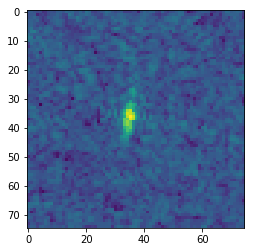

In [152]:
plt.imshow(blah)

Well shit. It worked. Wait.. where did the colors come from?

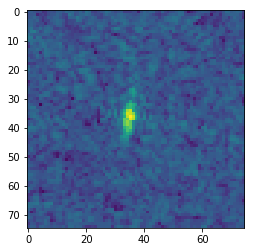

In [159]:
blah = blah.astype('uint8')
plt.imshow(blah)

Aha, so looks like in the absence of a color channel, matplotlib just does its own thing: it goes violet to gold, lowest num to highest. I tested and same on 256 and 512. Okay, so I just specify the image as grayscale then.

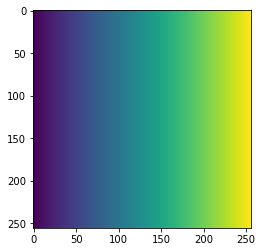

In [165]:
temp = np.array([[col for col in range(256)] for row in range(256)])
plt.imshow(temp)

Sweet:

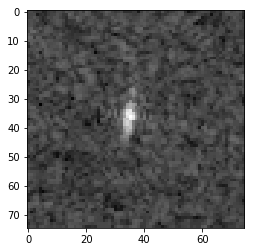

In [167]:
plt.imshow(blah, cmap='gray')

Great. I won't send this into a CNN, but if I have issues I can use this as a visualization tool. I'll make a function to import later.

In [174]:
# # some testing for the module

# mat = np.copy(b1_mat)
# mat = mat - np.min(mat) if np.min(mat) < 0 else mat
# mat = np.round(255 * mat / np.max(mat)).astype(int)

# mat2 = np.copy(b1_mat)
# mat2 = mat2 - np.min(mat2) if np.min(mat2) < 0 else mat2
# mat2 /= np.max(np.abs(mat2))
# mat2 *= 255
# mat2 = np.round(mat2)
# mat2.astype(int)

# np.isclose(mat, mat2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [182]:
# %pwd
# %cd ../..
from visuberg import visualize

In [183]:
visualize(float_matrix=mat)

/home/wnixalo/iceberg/visuberg.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if float_matrix == None:


UnboundLocalError: local variable 'mat' referenced before assignment

In [187]:
%reload_ext autoreload
%autoreload 2

Matplotlib not imported: importing. NOTE: if image doesn't appear, enter `%matplotlib inline` in Jupyter Notebook


/home/wnixalo/iceberg/visuberg.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if float_matrix == None:


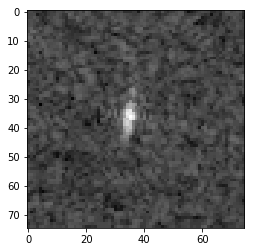

In [191]:
from visuberg import visualize # I don't think I had to explicitly import this again
visualize(float_matrix=mat)

In [190]:
mat

array([[69, 74, 64, ..., 85, 79, 52],
       [64, 69, 72, ..., 79, 64, 44],
       [64, 74, 83, ..., 74, 69, 36],
       ..., 
       [61, 64, 52, ..., 55, 83, 79],
       [44, 69, 64, ..., 72, 76, 72],
       [61, 76, 74, ..., 76, 69, 67]])

Got that working. Now to take a look at band 2 data and the other stuff before getting to work on a prelim model.

In [192]:
b2 = data[0]['band_2']; len(b2)

5625

Right, so there are 1604 training samples, and these here are from the 1st. HH & HV bands for all 1604 eh?

In [210]:
# # Can I just reshape this to 75x75x1? Feels irresponsible
# b2_mat = np.reshape(b2, (75, 75, 1))

In [211]:
# len(b2_mat[0][0])
# b2_mat[1][0]

# # Not a good idea..

array([-31.030518])

In [212]:
b2_mat = np.reshape(b2, (75, 75))

/home/wnixalo/iceberg/visuberg.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if float_matrix == None:


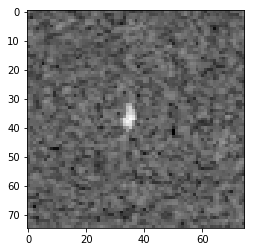

In [213]:
visualize(b2_mat)

And to see if there's an inclination and what this thing was (iceberg?):

In [216]:
data[0].keys()

dict_keys(['id', 'band_1', 'band_2', 'inc_angle', 'is_iceberg'])

In [217]:
data[0]['inc_angle'], data[0]['is_iceberg']

(43.9239, 0)

Hah.. it was a ship huh.. okay.

I think I start brute-forceish and throw a ResNet at the thing, then go from there.